In [19]:
import dataclasses
import functools
import itertools

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import KetSugar as ks
import MaxLik as ml
import HammerProj as hp


samplings = np.load('probes_samplings.npz')
cal_sampl = samplings['n32']
test_sampl = samplings['n108']

cal_states = np.array([ks.BlochKet(theta, phi) for theta, phi in cal_sampl])
test_states = np.array([ks.BlochKet(theta, phi) for theta, phi in test_sampl])

SX = np.array([0,1,1,0]).reshape((2,2))
SZ = np.array([1,0,0,-1]).reshape((2,2))

In [61]:
def apply_noise(rho_in, p_x=0.0, p_z=0.0): 
    rho_x = ks.ApplyOp(rho_in, SX)
    rho_bit_flipped = p_x*rho_x/2 + (1-p_x/2)*rho_in
    rho_phase_flipped = (1-p_z/2)*rho_bit_flipped + p_z*ks.ApplyOp(rho_bit_flipped, SZ)/2
    return rho_phase_flipped
    
px=0.0
pz=0.005
cal_rhos = np.array([apply_noise(ks.ketbra(ket, ket),px,pz) for ket in test_states])
purs = np.array([ks.Purity(r).real for r in cal_rhos])

0.9950124999999997 0.9996373971193416


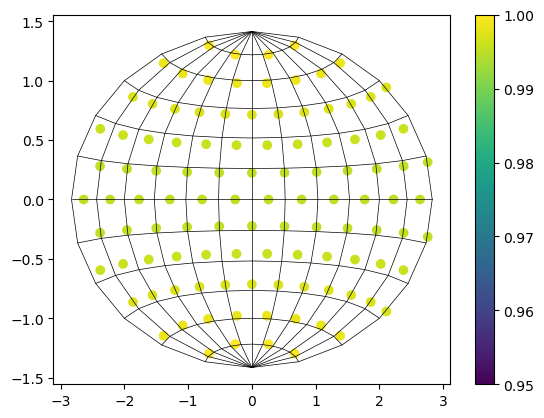

In [62]:
fig, ax = plt.subplots(1,1)
hp.PlotHammerGrid(ax,13,13,)
xys = np.array([hp.Hammer(*hp.BlochToGeo(*angles), True) for angles in test_sampl])

im = ax.scatter(xys[:,0], xys[:,1], c=purs, vmin=0.95, vmax=1)
fig.colorbar(im, ax=ax)
print(np.min(purs), np.max(purs))


   p (1-p)
p 
(1-p)